<a href="https://colab.research.google.com/github/Des-PM/DA/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dataz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir ~/.kaggle 
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
!unzip /content/dataco-smart-supply-chain-for-big-data-analysis.zip

 51% 13.0M/25.7M [00:00<00:00, 131MB/s]
100% 25.7M/25.7M [00:00<00:00, 175MB/s]
Archive:  /content/dataco-smart-supply-chain-for-big-data-analysis.zip
  inflating: DataCoSupplyChainDataset.csv  
  inflating: DescriptionDataCoSupplyChain.csv  
  inflating: tokenized_access_logs.csv  


In [5]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding='latin-1')

In [6]:
# check NaN values
null_columns = df.columns[df.isna().any()] 
# printing column names containing NaN
print('Columns with NaN values are:' , null_columns)

Columns with NaN values are: Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')


In [7]:
# removing the coumns having NaN values
df = df.drop(columns = null_columns, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
# below are the columns in the data which are irrelevant. It contains no information 
irrelevant_info_columns = ["Customer Email", "Customer Fname", 
                          "Customer Password", "Department Name", "Product Image", "Product Status", "Customer Street", "shipping date (DateOrders)", "order date (DateOrders)"]

In [9]:
df = df.drop(columns = irrelevant_info_columns, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [10]:
def check_duplicate_columns(dataframe_test):
    columns_names = []
    
    for ii in list(combinations(dataframe_test.columns, 2)):
        if np.all(dataframe_test[ii[0]] == dataframe_test[ii[1]]):
            columns_names.append(ii)
            print("{} and {} are the same".format(*ii))
    
    return columns_names

                
redundancies = check_duplicate_columns(df)

Benefit per order and Order Profit Per Order are the same
Sales per customer and Order Item Total are the same
Category Id and Product Category Id are the same
Customer Id and Order Customer Id are the same
Order Item Cardprod Id and Product Card Id are the same
Order Item Product Price and Product Price are the same


In [11]:
duplicate_cols_to_remove = ["Order Profit Per Order", "Order Item Total", "Product Category Id", 
                            "Order Customer Id", "Order Item Cardprod Id", "Order Item Product Price"]
df = df.drop(columns = duplicate_cols_to_remove, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

                     0
CANCELED          3692
CLOSED           19616
COMPLETE         59491
ON_HOLD           9804
PAYMENT_REVIEW    1893
PENDING          20227
PENDING_PAYMENT  39832
PROCESSING       21902
SUSPECTED_FRAUD   4062
['CANCELED' 'CLOSED' 'COMPLETE' 'ON_HOLD' 'PAYMENT_REVIEW' 'PENDING'
 'PENDING_PAYMENT' 'PROCESSING' 'SUSPECTED_FRAUD'] [ 3692 19616 59491  9804  1893 20227 39832 21902  4062]


([<matplotlib.patches.Wedge at 0x7f3b8e96b460>,
 [Text(1.0977301846479284, 0.07062890139896982, 'CANCELED'),
  Text(0.9807828709815739, 0.49806120104776447, 'CLOSED'),
  Text(-0.29954403608977603, 1.0584296719400148, 'COMPLETE'),
  Text(-1.095641260962441, 0.09782753843694757, 'ON_HOLD'),
  Text(-1.0927956736438185, -0.12568856616794197, 'PAYMENT_REVIEW'),
  Text(-0.9656205515140237, -0.5268557207564067, 'PENDING'),
  Text(-0.02872151174594294, -1.0996249700525302, 'PENDING_PAYMENT'),
  Text(0.9532064688139192, -0.5489967466308876, 'PROCESSING'),
  Text(1.097252635755152, -0.0776959029059588, 'SUSPECTED_FRAUD')],
 [Text(0.5987619188988699, 0.03852485530852899, '2.05%'),
  Text(0.5349724750808584, 0.2716697460260533, '10.87%'),
  Text(-0.1633876560489687, 0.5773252756036443, '32.96%'),
  Text(-0.5976225059795132, 0.0533604755110623, '5.43%'),
  Text(-0.5960703674420827, -0.06855739972796834, '1.05%'),
  Text(-0.5267021190076492, -0.28737584768531277, '11.20%'),
  Text(-0.015666279134150

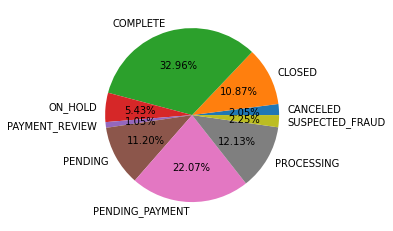

In [12]:
subj_labels, subj_counts = np.unique(df['Order Status'], return_counts = True)
print(pd.DataFrame(subj_counts, subj_labels))

print(subj_labels, subj_counts)

plt.pie(subj_counts, labels = subj_labels, autopct = '%.2f%%')

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Delivery Status'] = le.fit_transform(df['Delivery Status'])
df['Category Name'] = le.fit_transform(df['Category Name'])
df['Customer City'] = le.fit_transform(df['Customer City'])
df['Customer Country'] = le.fit_transform(df['Customer Country'])
df['Customer Segment'] = le.fit_transform(df['Customer Segment'])
df['Customer State'] = le.fit_transform(df['Customer State'])
df['Market'] = le.fit_transform(df['Market'])
df['Order City'] = le.fit_transform(df['Order City'])
df['Order Country'] = le.fit_transform(df['Order Country'])
df['Order Region'] = le.fit_transform(df['Order Region'])
df['Order State'] = le.fit_transform(df['Order State'])
df['Product Name'] = le.fit_transform(df['Product Name'])
df['Shipping Mode'] = le.fit_transform(df['Shipping Mode'])
df['Type'] = le.fit_transform(df['Type'])

[0 1] [176457   4062]


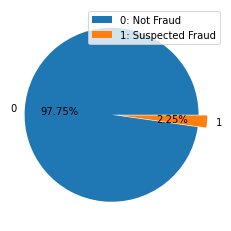

In [14]:
df['Order Status'] = df['Order Status'].replace(['CANCELED', 'CLOSED', 'COMPLETE', 'ON_HOLD', 'PAYMENT_REVIEW', 'PENDING',
 'PENDING_PAYMENT', 'PROCESSING', 'SUSPECTED_FRAUD'],
                                        [0, 0, 0, 0, 0, 0, 0, 0, 1])
new_subj_labels, new_subj_counts = np.unique(df['Order Status'], return_counts = True)
print(new_subj_labels, new_subj_counts)
myexplode = [0.05, 0.05]
plt.pie(new_subj_counts, labels = new_subj_labels, explode = myexplode, autopct = '%.2f%%')
plt.legend(['0: Not Fraud', '1: Suspected Fraud'])

In [15]:
X = df.drop('Order Status', axis=1)
Y = df['Order Status']
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  int64  
 9   Customer City                  180519 non-null  int64  
 10  Customer Country               180519 non-null  int64  
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.3, random_state = 7)


In [17]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###RFC BASELINE MODEL

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the decision tree classifier
clf_rfc = RandomForestClassifier()

# Train the classifier on the training data
clf_rfc.fit(X_train, Y_train)

# Make predictions on the test set
y_predict_rfc = clf_rfc.predict(X_test)

# Evaluate the performance of the model
recall = recall_score(Y_test, y_predict_rfc)
print("Recall of the RFC classifier: ", recall )

# Print the model parameters
print("Model parameters: ", clf_rfc.get_params())


Recall of the RFC classifier:  0.7958847736625514
Model parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Implementing Random Forest Regression
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfm = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 150, 250, 300,
                                                         350, 400, 450]},
gd_sr = GridSearchCV(estimator=rfm, param_grid=grid_param, scoring='recall', cv=5)
gd_sr.fit(X_train, Y_train)
best_parameters = gd_sr.best_params_
print("Optimal parameters:", best_parameters)
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator\n",
print("Best Result:", best_result)
rfm.fit(X_train,Y_train)
featimp = pd.Series(rfm.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

###Hypereparameter Tuning

In [ ]:

n_estimators = [50,100,150,250,300,350,400,450] # number of trees in the random forest
max_features = ['auto'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,
'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rfm2 = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfm2,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2,scoring='recall', random_state=35, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 150, 250, 300,
                                                         350, 400, 450]},
                   random_state=35, scoring='recall', verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [50, 100, 150, 250, 300, 350, 400, 450], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': False}  



In [ ]:
best_result = rf_random.best_score_ # Mean cross-validated score of the best_estimator\n",
print("Best score:", best_result)

Best score: 0.8507279622606603


In [ ]:
#Using the best parameter.
randmf = RandomForestClassifier(n_estimators = 350, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 70, bootstrap=True) 
randmf.fit( X_train, Y_train) 

RandomForestClassifier(max_depth=70, n_estimators=350)

###With SMOTE

In [ ]:
# Implementing Random Forest Classifier
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1) )
    ])
grid_param = {'classification__n_estimators': [10,20,30,40,50,100,150,200,300]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)



gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)
featimp = pd.Series(gd_sr.best_estimator_.named_steps["classification"].feature_importances_, index=list(X)).sort_values(ascending=False) # Getting feature importances list for the best model
print(featimp)

{'classification__n_estimators': 300}
0.6789861790243519
Delivery Status                  0.417047
Type                             0.277543
Late_delivery_risk               0.133121
Days for shipping (real)         0.035017
Customer Segment                 0.012106
Shipping Mode                    0.011144
Order Item Profit Ratio          0.010054
Days for shipment (scheduled)    0.008393
Order Item Discount Rate         0.007441
Order Item Quantity              0.005986
Order Item Discount              0.005730
Customer Id                      0.005588
Latitude                         0.004761
Order City                       0.004647
Order Country                    0.004605
Order State                      0.004590
Longitude                        0.004444
Order Item Id                    0.004274
Order Id                         0.004172
Order Region                     0.004102
Customer City                    0.003779
Customer State                   0.003613
Category Id        


*   RFC Baseline model: 0.7958847736625514
*   RFC Hyperparameter tuned model: 0.8507279622606603
*   RFC SMOTE model: 0.6789861790243519







##ADA Boost

Ada Boost Baseline model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Initialize the AdaBoost classifier
clf_ada = AdaBoostClassifier()

# Fit the classifier on the training data
clf_ada.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = clf_ada.predict(X_test)

# Compute the recall score
recall = recall_score(Y_test, y_pred)

print("Recall of the ADA classifier:", recall)

# Print the model parameters
print("Model parameters: ", clf_ada.get_params())


Ada Boost Hyperparameter tuning

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Define the AdaBoost classifier
ada = AdaBoostClassifier()

# Define the parameters for the GridSearchCV
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1]}

# Define the recall scoring method
recall_scorer = make_scorer(recall_score)

# Perform the GridSearchCV
grid_search = GridSearchCV(ada, parameters, scoring=recall_scorer)
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best recall score
print("Best parameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50}
Best recall score:  0.793110103906515


Ada boost with SMOTE

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', AdaBoostClassifier(random_state=1))
    ])
grid_param = {'classification__n_estimators': [50,100,150,200,300]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)



gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

featimp = pd.Series(gd_sr.best_estimator_.named_steps["classification"].feature_importances_, index=list(X)).sort_values(ascending=False) # Getting feature importances list for the best model
print(featimp)



{'classification__n_estimators': 50}
0.9908685598002034
Customer Segment                 0.26
Days for shipping (real)         0.22
Order Item Quantity              0.12
Order Item Discount Rate         0.08
Order Item Profit Ratio          0.04
Sales                            0.04
Delivery Status                  0.04
Product Price                    0.04
Category Id                      0.02
Category Name                    0.02
Order Region                     0.02
Customer Id                      0.02
Customer State                   0.02
Latitude                         0.02
Product Name                     0.02
Order Item Id                    0.02
Order State                      0.00
Order Item Discount              0.00
Product Card Id                  0.00
Type                             0.00
Longitude                        0.00
Order Id                         0.00
Order Country                    0.00
Order City                       0.00
Market                          



*   ADA Boost baseline model:
*   ADA Boost Hyperparameter model:0.793110103906515
*   ADA Boost with SMOTE model:0.9908685598002034




##SUPPORT VECTOR CLASSIFIER

SVC Baseline model

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score

# Create an instance of the SVC model
clf_svc = SVC()

# Train the classifier on the training data
clf_svc.fit(X_train, Y_train)

# Make predictions on the test set
y_predict_svc = clf_svc.predict(X_test)

# Evaluate the performance of the model
recall = recall_score(Y_test, y_predict_svc)
print("Recall of the SVC classifier: ", recall )

# Print the model parameters
print("Model parameters: ", clf_svc.get_params())

Recall of the SVC classifier:  0.297119341563786
Model parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC Hyperparameter tuning

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['rbf','linear']}


# Create the SVC object
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best parameters to create a new SVC object
svc = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'])

# Fit the SVC object to the data
svc.fit(X_train, Y_train)

# Use the SVC object to predict the labels of the test data
y_pred = svc.predict(X_test)

# Print the recall score
print("Recall Score:", recall_score(Y_test, y_pred))

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.6122270526932445
Recall Score: 0.6419753086419753


SVC SMOTE

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [10], 'kernel': [ 'rbf']}

# Create the SMOTE object
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train)

# Create the SVC object
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best parameters to create a new SVC object
svc = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'])

# Fit the SVC object to the data
svc.fit(X_train, Y_train)

# Use the SVC object to predict the labels of the test data
y_pred = svc.predict(X_test)

# Print the recall score
print("Recall Score:", recall_score(Y_test, y_pred))

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 1.0
Recall Score: 0.8098765432098766


SVC all scores

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Define the hyperparameters to tune
param_grid = {'C': [ 10],
              'kernel': ['rbf']}

# Create the SVC model
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best SVC model
best_svc = grid_search.best_estimator_

# Make predictions on the test set
Y_pred = best_svc.predict(X_test)

# Calculate evaluation metrics
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9840276239013221
Precision: 0.6446280991735537
Recall: 0.6419753086419753
F1-score: 0.643298969072165


svc confusion matrix

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search to find the best parameters
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best parameters
print(grid_search.best_params_)

# Train the model with the best parameters
svc = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'])
svc.fit(X_train, Y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print(confusion_mat)

{'C': 10, 'kernel': 'rbf'}
[[52511   430]
 [  435   780]]


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [22]:
def ML_model_training_testing(ML_model, X_train, y_train, X_test, y_test):
    CrossValid_scores = cross_validate(ML_model, X_train, Y_train, cv=10, scoring='accuracy', return_train_score=True)

    train_accuracy = np.mean(CrossValid_scores['train_score'])
    cross_val_accuracy = np.mean(CrossValid_scores['test_score'])

    print(f"Train accuracy = {train_accuracy*100:.4f}")
    print(f"Cross validation accuracy= {cross_val_accuracy*100:.4f}")

    # Train SVM classifier on the labelled dataset
    ML_model.fit(X_train, Y_train)

    #To plot confusion matrix and finding out precision,recall,accuracy and f1 score.
    y_predict = ML_model.predict(X_test)
    con_mat = confusion_matrix(Y_test, y_predict)
    print("Confusion matrix")
    print(con_mat)
    pre = precision_score(Y_test, y_predict)
    rec = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    accu = accuracy_score(Y_test, y_predict)
    print(f"Precision = {pre*100}")
    print(f"Accuracy = {accu*100}")
    print(f"F1 Score = {f1*100}")
    print(f"Recall = {rec*100}")
    
    return ML_model, y_predict

# Function to plot ROC curve
def plotROCcurve(y_true, y_predict, classifier_name=""):
    fpr, tpr, thresh = roc_curve(y_true, y_predict)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr).plot(color = "blue", label = f"ROC curve (area = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color = "red", lw = 2, linestyle = "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve of " + classifier_name +  " Classifier")
    plt.legend(loc="lower right")

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate

Train accuracy = 99.5529
Cross validation accuracy= 98.3365
Confusion matrix
[[52511   430]
 [  435   780]]
Precision = 64.46280991735537
Accuracy = 98.40276239013221
F1 Score = 64.3298969072165
Recall = 64.19753086419753


<Figure size 432x288 with 0 Axes>

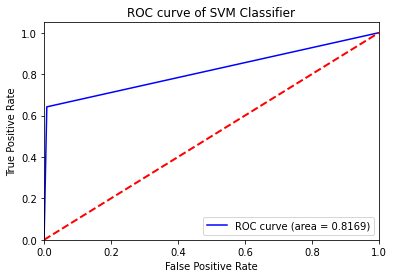

In [24]:
clf_SVM = SVC(C = 10, kernel = 'rbf')
trained_SVM_model, y_predict_SVM = ML_model_training_testing(clf_SVM, X_train, Y_train, X_test, Y_test)
plotROCcurve(Y_test, y_predict_SVM, classifier_name="SVM")

##RESULTS



*   SVC Baseline Model:29.71%
*   SVC Hyperparamater tuned Model:0.6122270526932445
*   SVC with SMOTE:1.0





XG Boost Baseline model

In [41]:
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Define the model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using recall score
recall = recall_score(Y_test, y_pred)
print("Recall score:", recall)

Recall score: 0.7300411522633745


##XG Boost Hyperparameter Tuning.

In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score


# define the model
xgb_model = xgb.XGBClassifier()

# define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [100, 200, 300]
}

# define the recall scoring metric
recall_scorer = make_scorer(recall_score)

# set up the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, scoring=recall_scorer)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# print the best parameters and the best recall score
print("Best parameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

# evaluate the model on the test set
y_pred = grid_search.predict(X_test)
test_recall = recall_score(Y_test, y_pred)
print("Test recall score: ", test_recall)

Best parameters:  {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Best recall score:  0.8573853790891993
Test recall score:  0.8880658436213992


XG BOOST With SMOTE

In [18]:
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# oversample minority class using SMOTE
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train)

# define xgboost classifier
xgb_clf = xgb.XGBClassifier()

# define hyperparameter grid to search
param_grid = {'max_depth': [7],
              'learning_rate': [0.1],
              'n_estimators': [300]}

# define scoring metric as recall
scoring = {'Recall': 'recall'}

# perform grid search with cross-validation
xgb_grid = GridSearchCV(xgb_clf, param_grid, cv=5, scoring=scoring, refit='Recall')
xgb_grid.fit(X_train, Y_train)

# print best parameters and recall score
print("Best parameters: ", xgb_grid.best_params_)
print("Best recall score: ", xgb_grid.best_score_)

# make predictions on test set and evaluate recall score
y_pred = xgb_grid.predict(X_test)
test_recall = recall_score(Y_test, y_pred)
print("Test recall score: ", test_recall)



Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best recall score:  0.9857588147188601
Test recall score:  0.8724279835390947


XG Boost confusion matrix

In [44]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split


# create XGBoost classifier with parameters
clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3)

# fit the classifier to the training data
clf.fit(X_train, Y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)

# calculate recall score
recall = recall_score(Y_test, y_pred)

# calculate f1 score
f1 = f1_score(Y_test, y_pred)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# calculate precision score
precision = precision_score(Y_test, y_pred)

# print results
print("Confusion Matrix: \n", conf_mat)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Confusion Matrix: 
 [[52806   135]
 [  136  1079]]
Recall:  0.8880658436213992
F1 Score:  0.8884314532729518
Accuracy:  0.9949959376615702
Precision:  0.8887973640856672


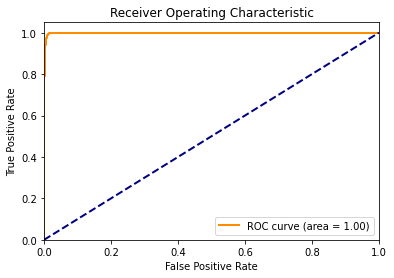

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# calculate the roc curve and auc
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

# plot the roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, Y, cv=5)
print("Cross Validation Scores: ", cv_scores)
print("Mean Cross Validation Score: ", cv_scores.mean())

Cross Validation Scores:  [0.99288168 0.98975183 0.9802238  0.97512741 0.98471041]
Mean Cross Validation Score:  0.9845390245424989


**## XG BOOST RESULTS**


*   XG Boost Baseline Model:0.7300411522633745   
*   XG Boost Hyperparameter tuned Model: 0.8573853790891993
*   XG Boost with SMOTE Model:0.9857588147188601


